In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import gensim
import os

In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess


story = []
for filename in os.listdir('harry_potter'):
    with open(os.path.join('harry_potter', filename), encoding='utf-8', errors='ignore') as f:
        corpus = f.read()
        raw_sent = sent_tokenize(corpus)
        for sent in raw_sent:
            story.append(simple_preprocess(sent))

In [9]:
story
//You can see, the sentences are also tokenized into words

[['the',
  'boy',
  'who',
  'lived',
  'mr',
  'and',
  'mrs',
  'dursley',
  'of',
  'number',
  'four',
  'privet',
  'drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  'thank',
  'you',
  'very',
  'much'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'you',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  'because',
  'they',
  'just',
  'didn',
  'hold',
  'with',
  'such',
  'nonsense'],
 ['mr',
  'dursley',
  'was',
  'the',
  'director',
  'of',
  'firm',
  'called',
  'grunnings',
  'which',
  'made',
  'drills'],
 ['he',
  'was',
  'big',
  'beefy',
  'man',
  'with',
  'hardly',
  'any',
  'neck',
  'although',
  'he',
  'did',
  'have',
  'very',
  'large',
  'mustache'],
 ['mrs',
  'dursley',
  'was',
  'thin',
  'and',
  'blonde',
  'and',
  'had',
  'nearly',
  'twice',
  'the',
  'usual',
  'amount',
  'of',
  'neck',
  'which',
  'came',
  'in',
  'very

In [10]:
model = gensim.models.Word2Vec(
    window=10, 
    min_count=2
)

In [ ]:
#unique words are add to the vocabulary 

In [11]:
model.build_vocab(story)

In [12]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(4148797, 5516820)

In [14]:
#number of tokens on which the model is actually trained: 4148797
#no. of epochs = 5, default value
#use model.wv. to access various functions

In [19]:
model.wv.most_similar('hermione')

[('ginny', 0.6679383516311646),
 ('luna', 0.6314209699630737),
 ('neville', 0.5882695913314819),
 ('she', 0.5869289636611938),
 ('cho', 0.5518980026245117),
 ('dean', 0.5298027992248535),
 ('krum', 0.5274862051010132),
 ('lavender', 0.5128119587898254),
 ('meaningful', 0.5086148381233215),
 ('microwave', 0.5065953135490417)]

In [18]:
model.wv.most_similar('dumbledore')

[('snape', 0.894917905330658),
 ('sirius', 0.7601229548454285),
 ('slughorn', 0.7374224066734314),
 ('moody', 0.7224207520484924),
 ('voldemort', 0.7008846998214722),
 ('fudge', 0.6600199937820435),
 ('lupin', 0.6529811024665833),
 ('riddle', 0.6410912275314331),
 ('quirrell', 0.6042472720146179),
 ('headmaster', 0.5831795334815979)]

In [20]:
model.wv.doesnt_match(['ron', 'bill', 'charlie', 'ginny', 'harry', 'arthur'])

'harry'

In [70]:
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
all_words = [w for sent in story for w in sent]


filtered = [w for w in all_words if w not in stop]

word_counts = Counter(filtered)
top20 = word_counts.most_common(50)
print(top20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('harry', 22919), ('said', 14491), ('ron', 6329), ('potter', 5887), ('hermione', 5357), ('page', 4818), ('rowling', 4713), ('dumbledore', 3365), ('back', 3243), ('could', 2861), ('one', 2652), ('know', 2515), ('like', 2405), ('looked', 2361), ('would', 2310), ('around', 2261), ('got', 2083), ('well', 2053), ('hagrid', 2042), ('professor', 2034), ('see', 1933), ('snape', 1827), ('though', 1814), ('looking', 1801), ('think', 1747), ('time', 1732), ('still', 1727), ('get', 1712), ('wand', 1660), ('right', 1654), ('eyes', 1619), ('weasley', 1602), ('face', 1583), ('going', 1476), ('voice', 1460), ('look', 1447), ('go', 1432), ('room', 1358), ('order', 1342), ('come', 1337), ('malfoy', 1333), ('head', 1330), ('door', 1325), ('thought', 1293), ('mr', 1282), ('half', 1268), ('voldemort', 1248), ('something', 1224), ('saw', 1219), ('phoenix', 1211)]


In [71]:
v1 = model.wv['come']
v2 = model.wv['go']
v3  = model.wv['voldemort']

new_vec = v1-v2+v3


result = model.wv.most_similar([new_vec], topn=10)
print(result)


[('voldemort', 0.9181774854660034), ('sirius', 0.7029199004173279), ('dumbledore', 0.6181550621986389), ('being', 0.6070966124534607), ('survived', 0.5964666604995728), ('represented', 0.5851989388465881), ('regulus', 0.5531479716300964), ('hallow', 0.5469110608100891), ('wormtail', 0.5424887537956238), ('whim', 0.5378665924072266)]


In [74]:
print(v1)

[-7.5481182e-01 -1.4898677e+00  1.2003610e+00  1.8677912e+00
  1.0286986e+00  1.3700838e-01  5.1931238e-01 -1.4227639e+00
 -1.7452958e+00 -2.1257136e+00  8.3652151e-01 -5.8829361e-01
  1.9392284e+00  1.1080680e+00  5.2039617e-01 -4.1871458e-01
 -2.0141869e+00  5.5924691e-02 -9.3546748e-01 -1.2216398e+00
  2.0573170e+00  2.9011381e+00 -6.7401022e-01  8.5432684e-01
 -3.4578100e-01 -1.4490480e+00 -1.3713602e+00 -8.8054925e-02
  5.8972245e-01 -2.9628518e-01 -1.7992228e+00  4.0360582e-01
 -1.0556755e+00 -7.5055465e-02 -1.2100571e+00  2.0772547e-01
  5.3722930e-01 -1.6773208e+00  1.5522614e+00 -2.6810985e+00
  7.6985615e-01  1.3111463e+00 -4.2156291e-01 -9.4421315e-01
  8.0732524e-01  7.0116967e-01 -7.5578678e-01  6.7686278e-01
  2.2749357e-01  1.0073936e+00 -7.2741248e-02  1.0079514e+00
  2.4762163e+00 -1.9380823e+00  1.1311593e+00  2.0204236e-01
 -2.4801283e+00  5.2915225e-03 -3.3482340e-01  4.7351426e-01
  2.1234211e-01  1.7031707e+00 -9.7031397e-01 -6.0733604e-01
  1.1543561e-01  2.34916

In [22]:
model.wv.doesnt_match(['ron', 'cedric', 'dumbledore', 'ginny', 'harry'])

'dumbledore'

In [23]:
model.wv.similarity('ron','hermione')

0.4715984

In [66]:
model.wv.similarity('harry','dumbledore')

0.32860023

In [24]:
model.wv.similarity('harry','ginny')

0.2436784

In [25]:
model.wv.get_normed_vectors().shape

(14463, 100)

In [26]:
#number of unique words = 14463
#size of the word embeddings =100 (in the standard Gensim implementation of Word2Vec, the default embedding-vector dimension is 100)


In [29]:
y = model.wv.index_to_key
y

['the',
 'and',
 'to',
 'of',
 'harry',
 'he',
 'was',
 'you',
 'it',
 'said',
 'his',
 'in',
 'that',
 'had',
 'at',
 'as',
 'on',
 'him',
 'they',
 'with',
 'ron',
 'but',
 'potter',
 'for',
 'her',
 'not',
 'hermione',
 'she',
 'what',
 'page',
 'rowling',
 'be',
 'out',
 'up',
 'all',
 'were',
 'them',
 'have',
 'from',
 'we',
 'there',
 'into',
 'dumbledore',
 'who',
 'been',
 'this',
 'back',
 'so',
 'is',
 'me',
 'could',
 'no',
 'now',
 'if',
 'then',
 'an',
 'one',
 'their',
 'know',
 'about',
 'over',
 'like',
 'down',
 'looked',
 'when',
 'do',
 'just',
 'would',
 'did',
 'around',
 'by',
 'your',
 've',
 'got',
 'very',
 'well',
 'hagrid',
 'can',
 'are',
 'professor',
 'my',
 'don',
 'again',
 'see',
 'more',
 're',
 'off',
 'snape',
 'though',
 'how',
 'looking',
 'think',
 'time',
 'still',
 'get',
 'wand',
 'right',
 'eyes',
 'or',
 'weasley',
 'll',
 'face',
 'through',
 'which',
 'going',
 'before',
 'here',
 'voice',
 'look',
 'go',
 'where',
 'didn',
 'than',
 'will

In [30]:
len(y)

14463

In [32]:
y[67]

'would'

In [33]:
#we haven't removed the stop words

In [34]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=3)

In [48]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [49]:
X.shape

(14463, 3)

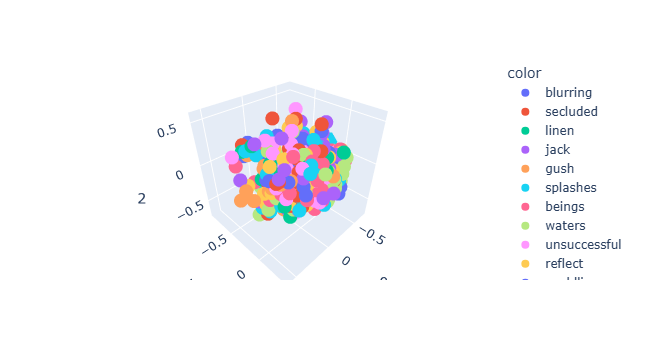

In [50]:
##printing first 200 words
import plotly.express as px
fig = px.scatter_3d(X[10000:10500], x=0, y=1, z=2, color = y[10000:10500])
fig.show()